# James Turner YT Sims 4 2024 DLC Survey

Data from https://jamesturner.yt/sims-pack-ratings/2024

In [16]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

## Import Data

In [52]:
player_data = pd.read_excel('The Sims 4 DLC Survey 2024.xlsx', sheet_name = 'Survey - Player Results')
player_data = player_data.set_index('survey_id')
player_data

,platform,player_cas,player_build,player_live,packs
survey_id,,,,,
1,0,1,0,1,"[""EP02"",""EP03"",""EP05"",""EP06"",""EP08"",""EP09"",""SP..."
2,5,0,1,1,"[""EP01"",""EP03"",""EP04"",""EP05"",""EP06"",""EP07"",""EP..."
3,0,0,1,0,"[""EP01"",""EP02"",""EP03"",""EP04"",""EP05"",""EP06"",""EP..."
4,0,1,1,1,"[""EP01"",""EP02"",""EP03"",""EP04"",""EP05"",""EP06"",""EP..."
5,0,1,1,1,"[""EP01"",""EP02"",""EP03"",""EP04"",""EP05"",""EP06"",""EP..."
...,...,...,...,...,...
15152,0,1,1,1,"[""EP01"",""EP02"",""EP03"",""EP04"",""EP05"",""EP06"",""EP..."
15153,0,1,0,0,"[""EP01"",""EP02"",""EP03"",""EP04"",""EP05"",""EP08"",""EP..."
15154,0,0,0,1,"[""EP01"",""EP02"",""EP03"",""EP04"",""EP05"",""EP06"",""EP..."


In [3]:
summary_per_pack = pd.read_excel('The Sims 4 DLC Survey 2024.xlsx', sheet_name = 'Summary - Pack Results')
summary_per_pack

,pack_code,avg_rating,avg_gameplay,avg_buildmode,avg_cas,avg_world,avg_bugs,owned,owned_percent,unowned,...,bugeffect,promo_percent,bugeffect_percent,avg_pack_rating,getpack_will_buy,getpack_might_buy,getpack_on_sale,getpack_free,getpack_no,getpackbugs_percent
0,EP01,NaN,6.7403,4.8318,4.1164,2.1182,3.6673,12478,82.3304,2678,...,2457,2.2760,19.6907,4.451675,118,195,1017,1184,164,4.8004
1,EP02,NaN,6.4540,6.8248,5.5796,8.5605,1.8775,12332,81.3671,2824,...,402,1.2001,3.2598,6.854725,162,349,1225,892,196,1.3704
2,EP03,NaN,7.4340,7.0164,6.0849,8.3623,2.6782,13522,89.2188,1634,...,1158,1.1833,8.5638,7.224400,158,254,729,407,86,0.9984
3,EP04,NaN,7.2864,7.2529,6.0738,8.0083,2.6219,13833,91.2708,1323,...,1369,1.3157,9.8966,7.155350,142,225,476,332,148,0.9253
4,EP05,NaN,8.3771,7.6648,6.9536,NaN,2.2274,14295,94.3191,861,...,1057,1.2032,7.3942,7.665167,160,180,272,175,74,0.7275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,SP51,4.8829,NaN,NaN,NaN,NaN,NaN,3399,22.4268,11757,...,0,2.6773,0.0000,NaN,180,718,1701,6359,2799,NaN
77,SP52,6.7900,NaN,NaN,NaN,NaN,NaN,4171,27.5205,10985,...,0,2.6852,0.0000,NaN,445,1633,2751,4852,1304,NaN
78,SP53,6.9886,NaN,NaN,NaN,NaN,NaN,4140,27.3159,11016,...,0,2.1256,0.0000,NaN,589,1805,2846,4456,1320,NaN
79,SP54,7.9913,NaN,NaN,NaN,NaN,NaN,4231,27.9163,10925,...,0,1.8908,0.0000,NaN,1130,2450,2796,3769,780,NaN


In [5]:
raw_data = pd.concat([
    pd.read_excel('The Sims 4 DLC Survey 2024.xlsx',sheet_name = 'Survey - Pack Results 1'),
    pd.read_excel('The Sims 4 DLC Survey 2024.xlsx',sheet_name = 'Survey - Pack Results 2')]
)

TypeError: 'tuple' object is not callable

In [314]:
print(raw_data.shape)
raw_data.head()

(1227636, 13)


,result_id,survey_id,pack_code,rating,gameplay,buildmode,cas,world,bugs,promo,bugeffect,getpack,getpackbugs
0,1,1,EP01,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3.0,0.0
1,2,1,EP02,NaN,6.0,6.0,4.0,8.0,3.0,0,0,NaN,NaN
2,3,1,EP03,NaN,7.0,6.0,5.0,9.0,2.0,0,0,NaN,NaN
3,4,1,EP04,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2.0,0.0
4,5,1,EP05,NaN,8.0,6.0,5.0,NaN,2.0,0,0,NaN,NaN


## Question 1: How many completionists do we have?

More visualizations of "gamer type"

How many people own all packs? What's the distribution of pack ownership?

### More visualizations for "Gamer Type"

In [53]:
gamer_type_raw = player_data[['player_cas', 'player_build', 'player_live']]
gamer_type_raw = gamer_type_raw.replace({0: False, 1: True})
gamer_type_raw

,player_cas,player_build,player_live
survey_id,,,
1,True,False,True
2,False,True,True
3,False,True,False
4,True,True,True
5,True,True,True
...,...,...,...
15152,True,True,True
15153,True,False,False
15154,False,False,True


In [24]:
gamer_type_raw.columns

Index(['player_cas', 'player_build', 'player_live'], dtype='object')

#### venn diagram actually showing realistic percentages

In [12]:
from matplotlib_venn import venn3

In [35]:
# replace true/false with the index to become a unique value for the venn diagram set
for_set = gamer_type_raw.T.apply(lambda x: np.where(x, str(x.name), np.nan)).T.reset_index().set_index('survey_id')
for_set

,player_cas,player_build,player_live
survey_id,,,
1,1,nan,1
2,nan,2,2
3,nan,3,nan
4,4,4,4
5,5,5,5
...,...,...,...
15152,15152,15152,15152
15153,15153,nan,nan
15154,nan,nan,15154


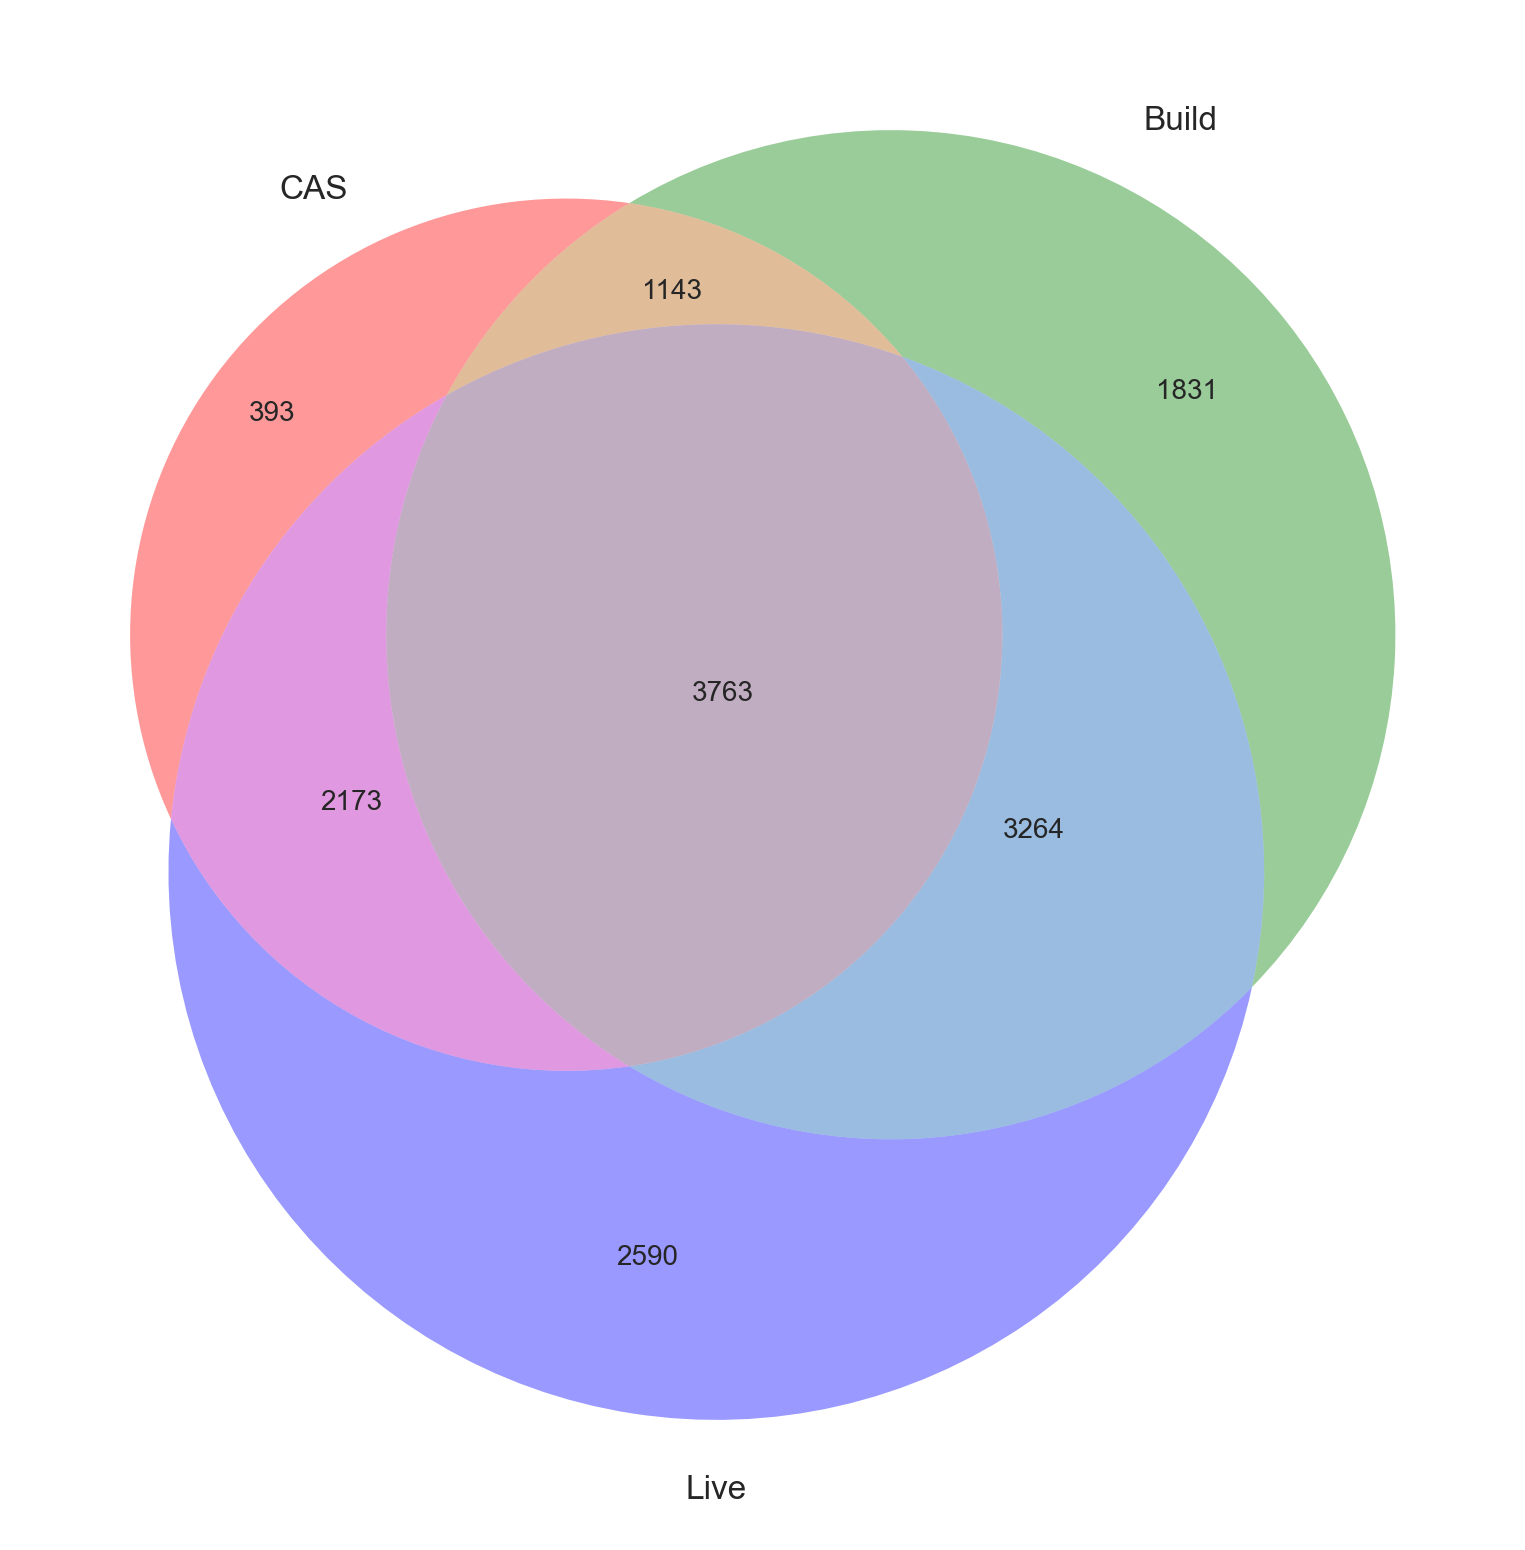

In [41]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
venn3([set(for_set['player_cas'].to_list()),
       set(for_set['player_build'].to_list()),
       set(for_set['player_live'].to_list())
      ], 
      ('CAS', 'Build', 'Live'),
     )
plt.savefig('player_style_venn.png')
plt.show()

### What's the distribution of pack ownership?

how many packs do people usually own? how many people own all?

In [56]:
player_data['packs_clean'] = player_data['packs'].apply(
    lambda x: x.replace('[', '').replace(']', '').replace('"', '')
)

pack_ownership_bool = player_data['packs_clean'].str.get_dummies(sep=',').astype(bool)
pack_ownership = pack_ownership_bool.mul(1)
pack_ownership

,EP01,EP02,EP03,EP04,EP05,EP06,EP07,EP08,EP09,EP10,...,SP46,SP47,SP48,SP49,SP50,SP51,SP52,SP53,SP54,SP55
survey_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
15153,1,1,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
15154,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,0


In [65]:
num_owners = pd.DataFrame(pack_ownership.sum(), columns = ['Num Owners'])
num_owners.sort_values('Num Owners')

,Num Owners
SP28,2915
SP50,3265
SP51,3399
SP30,3511
SP44,3683
...,...
SP16,13077
EP11,13253
EP03,13522
EP04,13833


In [67]:
num_packs_owned = pd.DataFrame(pack_ownership.sum(axis = 1), columns = ['Num Packs Owned'])
num_packs_owned

,Num Packs Owned
survey_id,
1,9
2,20
3,76
4,81
5,43
...,...
15152,78
15153,23
15154,29


In [71]:
by_pack = pack_ownership.T.reset_index().rename(columns = {'index': 'Pack Num'}).set_index('Pack Num')
by_pack

survey_id,1,2,3,4,5,6,7,8,9,10,...,15147,15148,15149,15150,15151,15152,15153,15154,15155,15156
Pack Num,,,,,,,,,,,,,,,,,,,,,
EP01,0,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
EP02,1,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
EP03,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
EP04,0,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
EP05,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP51,0,0,1,1,0,0,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0
SP52,0,0,1,1,0,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
SP53,0,0,1,1,0,0,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0


#### read the pack name to know which type of pack it is

https://sims4.crinrict.com/eng/extras-2/available-packs-dlc/

use this website to get the name of EPs and their release dates

In [81]:
from bs4 import BeautifulSoup
import requests 

webpage = requests.get('https://sims4.crinrict.com/eng/extras-2/available-packs-dlc/')
soup = BeautifulSoup(webpage.content)
html = soup.find_all("article")

In [317]:
# from CHAT GPT because i'm not used to html
# Initialize an empty list to store dictionaries
packs = []

# Find all the <h2> elements, which separate the sections
sections = soup.find_all('h2', class_='wp-block-heading')

# Iterate over each section
for section in sections:
    pack_type = section.get_text().strip()  # Get the text of the section (e.g., "Expansion Packs")
    
    # Find the <ul> that follows this <h2>
    ul = section.find_next('ul')
    
    # Iterate over each <li> in the <ul>
    for li in ul.find_all('li'):
        # Extract the date, pack ID, and name
        # The date is the first part of the <li> text
        date = li.contents[0].strip().replace(':','') if li.contents else None
        
        # The <b> tag contains the pack ID
        pack_id_tag = li.find('b')
        pack_id = pack_id_tag.get_text() if pack_id_tag else None
        
        # The <a> tag contains the pack name
        name_tag = li.find('a')
        name = name_tag.get_text().strip() if name_tag else None
        
        # Only add valid packs to the list
        if date and pack_id and name:
            pack = {
                'pack_type': pack_type,
                'release date': date,
                'pack_id': pack_id,
                'pack name': name
            }
            packs.append(pack)

# Print the result
pack_info = pd.DataFrame(packs)
pack_info

,pack_type,release date,pack_id,pack name
0,Expansion Packs,03/31/2015,EP01,Get To Work
1,Expansion Packs,12/08/2015,EP02,Get Together
2,Expansion Packs,11/01/2016,EP03,City Living
3,Expansion Packs,11/10/2017,EP04,Cats & Dogs
4,Expansion Packs,06/22/2018,EP05,Seasons
...,...,...,...,...
79,Kits,05/30/2024,SP53,Cozy Bistro Kit
80,Kits,09/19/2024,SP54,Artist Studio Kit
81,Kits,09/19/2024,SP55,Storybook Nursery Kit
82,Creator Kit,12/01/2014,FP01,Holiday Celebration


In [318]:
pack_info.columns

Index(['pack_type', 'release date', 'pack_id', 'pack name'], dtype='object')

#### Add pack type into df for how many packs a person has

In [98]:
pack_counts = pd.merge(
    left = by_pack, 
    left_index = True,
    right = pack_info,
    right_on = 'pack_id',
    how = 'left'
).set_index(list(pack_info.columns))
pack_counts

1      2      \
pack_type       release date pack_id pack name                             
Expansion Packs 03/31/2015   EP01    Get To Work                0      1   
                12/08/2015   EP02    Get Together               1      0   
                11/01/2016   EP03    City Living                1      1   
                11/10/2017   EP04    Cats & Dogs                0      1   
                06/22/2018   EP05    Seasons                    1      1   
...                                                           ...    ...   
Kits            04/18/2024   SP51    Party Essentials Kit       0      0   
                05/30/2024   SP52    Riviera Retreat Kit        0      0   
                             SP53    Cozy Bistro Kit            0      0   
                09/19/2024   SP54    Artist Studio Kit          0      0   
                             SP55    Storybook Nursery Kit      0      0   

                                                            3      4      \
pack_type       release date pack_id pack name                             
Expansion Packs 03/31/2015   EP01    Get To Work                1      1   
                12/08/2015   EP02    Get Together               1      1   
                11/01/2016   EP03    City Living                1      1   
                11/10/2017   EP04    Cats & Dogs                1      1   
                06/22/2018   EP05    Seasons                    1      1   
...                                                           ...    ...   
Kits            04/18/2024   SP51    Party Essentials Kit       1      1   
                05/30/2024   SP52    Riviera Retreat Kit        1      1   
                             SP53    Cozy Bistro Kit            1      1   
                09/19/2024   SP54    Artist Studio Kit          1      1   
                             SP55    Storybook Nursery Kit      1      1   

                                                            5      6      \
pack_type       release date pack_id pack name                             
Expansion Packs 03/31/2015   EP01    Get To Work                1      1   
                12/08/2015   EP02    Get Together               1      1   
                11/01/2016   EP03    City Living                1      1   
                11/10/2017   EP04    Cats & Dogs                1      1   
                06/22/2018   EP05    Seasons                    1      1   
...                                                           ...    ...   
Kits            04/18/2024   SP51    Party Essentials Kit       0      0   
                05/30/2024   SP52    Riviera Retreat Kit        0      0   
                             SP53    Cozy Bistro Kit            0      0   
                09/19/2024   SP54    Artist Studio Kit          0      0   
                             SP55    Storybook Nursery Kit      0      0   

                                                            7      8      \
pack_type       release date pack_id pack name                             
Expansion Packs 03/31/2015   EP01    Get To Work                1      1   
                12/08/2015   EP02    Get Together               1      1   
                11/01/2016   EP03    City Living                1      1   
                11/10/2017   EP04    Cats & Dogs                1      1   
                06/22/2018   EP05    Seasons                    1      1   
...                                                           ...    ...   
Kits            04/18/2024   SP51    Party Essentials Kit       0      1   
                05/30/2024   SP52    Riviera Retreat Kit        0      1   
                             SP53    Cozy Bistro Kit            1      1   
                09/19/2024   SP54    Artist Studio Kit          1      1   
                             SP55    Storybook Nursery Kit      1      1   

                                                            9      10     ...  \
pack_type       release

In [101]:
per_player_per_type = pack_counts.reset_index().groupby('pack_type').sum()
per_player_per_type

,1,2,3,4,5,6,7,8,9,10,...,15147,15148,15149,15150,15151,15152,15153,15154,15155,15156
pack_type,,,,,,,,,,,,,,,,,,,,,
Expansion Packs,6,9,16,16,15,12,16,16,16,13,...,16,16,4,12,16,15,9,14,16,0
Game Packs,0,4,12,12,10,9,12,12,12,7,...,12,12,1,9,11,11,6,10,10,0
Kits,1,0,28,33,0,1,16,33,33,5,...,33,33,0,1,8,32,3,0,19,0
Stuff Packs,2,7,20,20,18,17,15,20,20,10,...,20,20,3,11,20,20,5,5,17,3


#### make histograms of pack ownership

In [145]:
print(num_packs_owned.max()[0])
num_packs_owned.head()

81


,Num Packs Owned
survey_id,
1,9
2,20
3,76
4,81
5,43


In [313]:
num_packs_owned.value_counts(normalize = True)

Num Packs Owned
81                 0.111177
80                 0.016693
17                 0.016231
28                 0.015571
24                 0.015571
                     ...   
73                 0.006202
4                  0.005278
3                  0.003959
2                  0.003035
1                  0.001979
Length: 81, dtype: float64

##### detour: get colors and formatting

In [174]:
pack_type_list = ['Expansion Packs', 'Game Packs', 'Stuff Packs', 'Kits'] # specifically ordered
pack_type_list

['Expansion Packs', 'Game Packs', 'Stuff Packs', 'Kits']

In [164]:
color_map_raw = {
    'Expansion Packs': (13,191,191), # teal
    'Game Packs': (43,0,255), # royal blue/purple
    'Stuff Packs': (100,196,60), # green
    'Kits': (143,51,170), # pink/purple
    'player_cas': (48,155,46), # green
    'player_build': (202,113,43), # orange
    'player_live': (33,135,207), # blue
    'gray': (37,38,38)
}

color_map = {}
for name, (r,g,b) in color_map_raw.items():
    new_rgb = ( r / 255.0, g / 255.0, b / 255.0, 1 )
    color_map[name] = new_rgb
    

In [260]:
plt.rcParams.update({
    'font.family': 'fantasy', # impact lmaooo
    'font.size': 14,
    'axes.labelsize': 12,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.weight': 'normal'
})

#### back to plots

[]

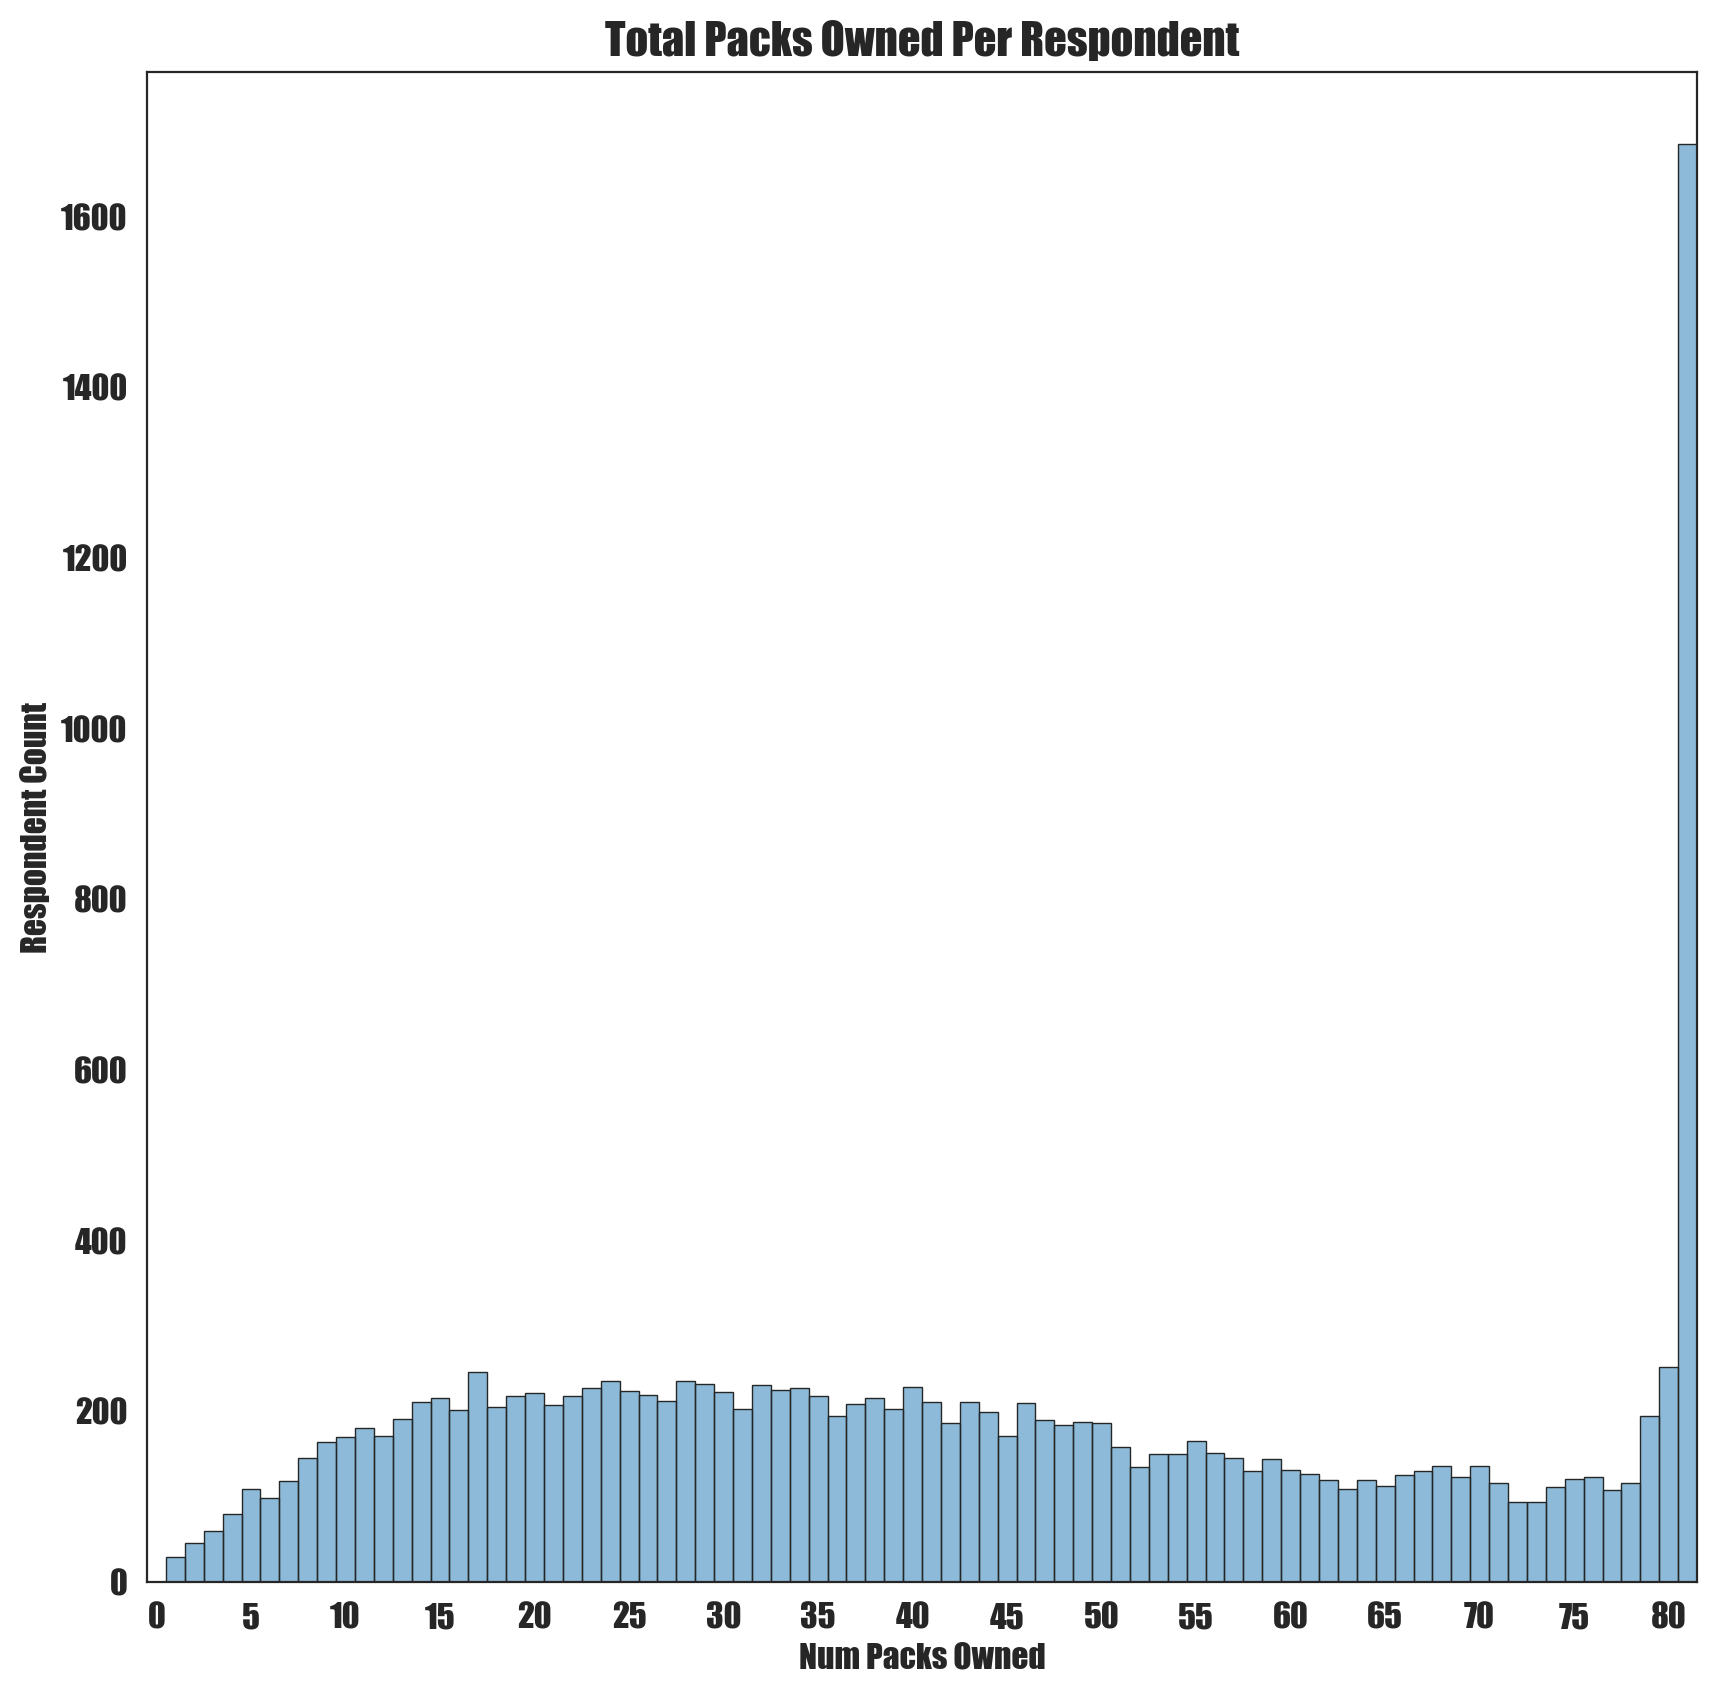

In [265]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.histplot(
    num_packs_owned,
    ax = ax,
    bins = num_packs_owned.max()[0],
    legend = False,
    edgecolor = color_map['gray'],
    linewidth = 0.5,
    discrete = True
)
max_packs =  num_packs_owned.max()[0] + 1
ax.set_xticks(range(0, max_packs, num_packs_owned.max()[0]//16))
ax.set_xlim((0 - 0.5, max_packs - 0.5))
ax.set_xlabel('Num Packs Owned')
ax.set_ylabel('Respondent Count')
ax.set_title('Total Packs Owned Per Respondent')
plt.savefig('total_packs_owned_hist.png', bbox_inches = 'tight')
plt.plot()

/var/folders/2t/234s6xs95kx9z2wmjnqs__980000gn/T/ipykernel_46491/1420460743.py:32: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.3, wspace=0.3, top = 0.9)


[]

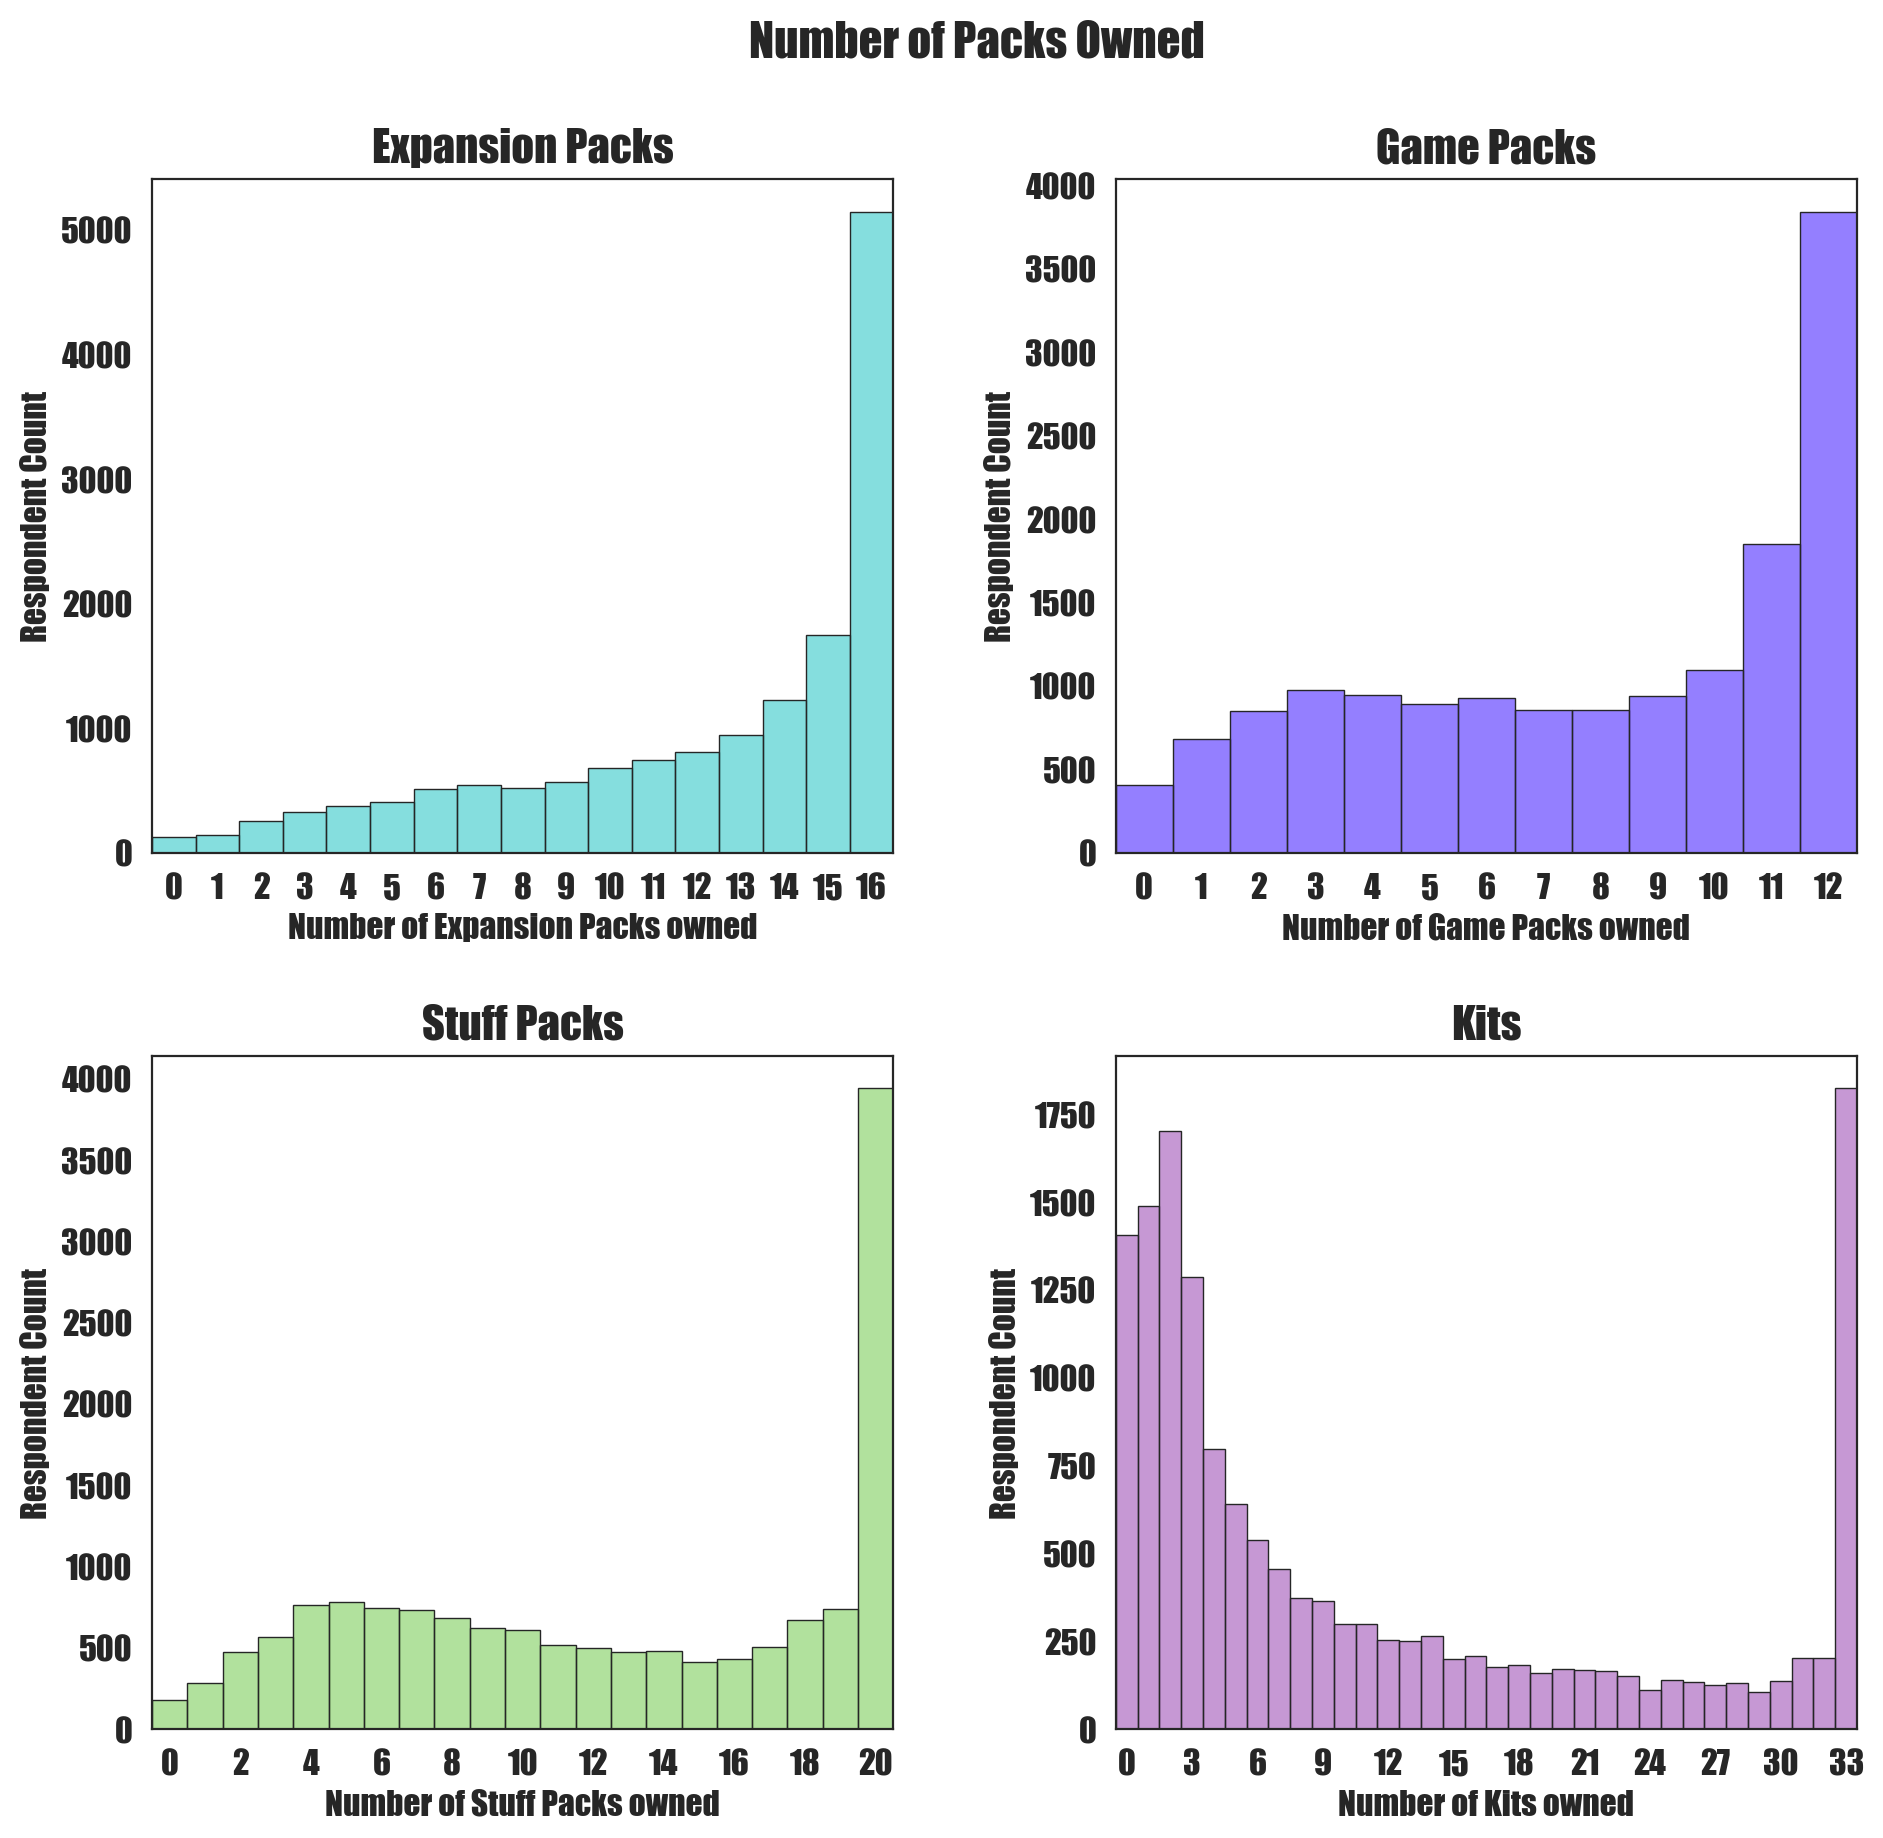

In [278]:
fig, axes = plt.subplots(
    figsize = (11,10), dpi = 200,
    nrows = 2, ncols = 2,
    constrained_layout = True
)

for i, pack_type in enumerate( pack_type_list ):
    ax = axes[
        i // 2,
        i % 2
    ]
    df = per_player_per_type.T[[pack_type]]
    sns.histplot(
        data = df,
        ax = ax,
        bins = df.max()[0],
        legend = False,
        palette = color_map,
        edgecolor = color_map['gray'],
        linewidth = 0.5,
        discrete = True
    )
    ax.set_title(pack_type)
    ax.set_xlabel('Num Packs Owned')
    ax.set_ylabel('Respondent Count')
    max_packs = df.max()[0] + 1
    ax.set_xticks(range(0, max_packs, df.max()[0]//10))
    ax.set_xlim((-0.5, max_packs - 0.5))
    ax.set_xlabel(f'Number of {pack_type} owned')

plt.suptitle('Number of Packs Owned')
plt.subplots_adjust(hspace=0.3, wspace=0.3, top = 0.9)
plt.savefig('packs_owned_hist_by_type.png', bbox_inches = 'tight')
plt.plot()

### In people who have almost every single pack, which ones are they missing?

In [281]:
# missing a single kit = 80
almost_all = pack_counts.T[pack_counts.sum() == 80]
print(almost_all.shape)
respondents = almost_all.shape[0]
last_pack = pd.DataFrame(almost_all.sum()).rename(columns = {0: 'Num Owning'}).sort_values('Num Owning')
last_pack['Num Missing'] = respondents - last_pack['Num Owning']
last_pack

(253, 81)


Num Owning  \
pack_type       release date pack_id pack name                                 
Game Packs      09/08/2020   GP09    Star Wars: Journey to Batuu         171   
Kits            03/02/2021   SP22    Bust The Dust Kit                   197   
                12/02/2021   SP28    Modern Menswear Kit                 223   
Expansion Packs 07/25/2024   EP16    Lovestruck                          235   
Kits            09/19/2024   SP54    Artist Studio Kit                   242   
...                                                                      ...   
Game Packs      06/16/2022   GP12    Werewolves                          253   
                06/01/2021   GP10    Dream Home Decorator                253   
                09/10/2019   GP08    Realm of Magic                      253   
Stuff Packs     02/09/2016   SP06    Romantic Garden Stuff               253   
                01/16/2018   SP13    Laundry Day Stuff                   253   

                                                                  Num Missing  
pack_type       release date pack_id pack name                                 
Game Packs      09/08/2020   GP09    Star Wars: Journey to Batuu           82  
Kits            03/02/2021   SP22    Bust The Dust Kit                     56  
                12/02/2021   SP28    Modern Menswear Kit                   30  
Expansion Packs 07/25/2024   EP16    Lovestruck                            18  
Kits            09/19/2024   SP54    Artist Studio Kit                     11  
...                                                                       ...  
Game Packs      06/16/2022   GP12    Werewolves                             0  
                06/01/2021   GP10    Dream Home Decorator                   0  
                09/10/2019   GP08    Realm of Magic                         0  
Stuff Packs     02/09/2016   SP06    Romantic Garden Stuff                  0  
                01/16/2018   SP13    Laundry Day Stuff                      0  

[81 rows x 2 columns]

In [319]:
cmap_for_packs = {}
pack_info_list = list(last_pack.reset_index()[['pack name', 'pack_type']].T.to_dict(orient = 'list').values())
for packname, packtype in pack_info_list:
    cmap_for_packs[packname] = color_map[packtype]


[]

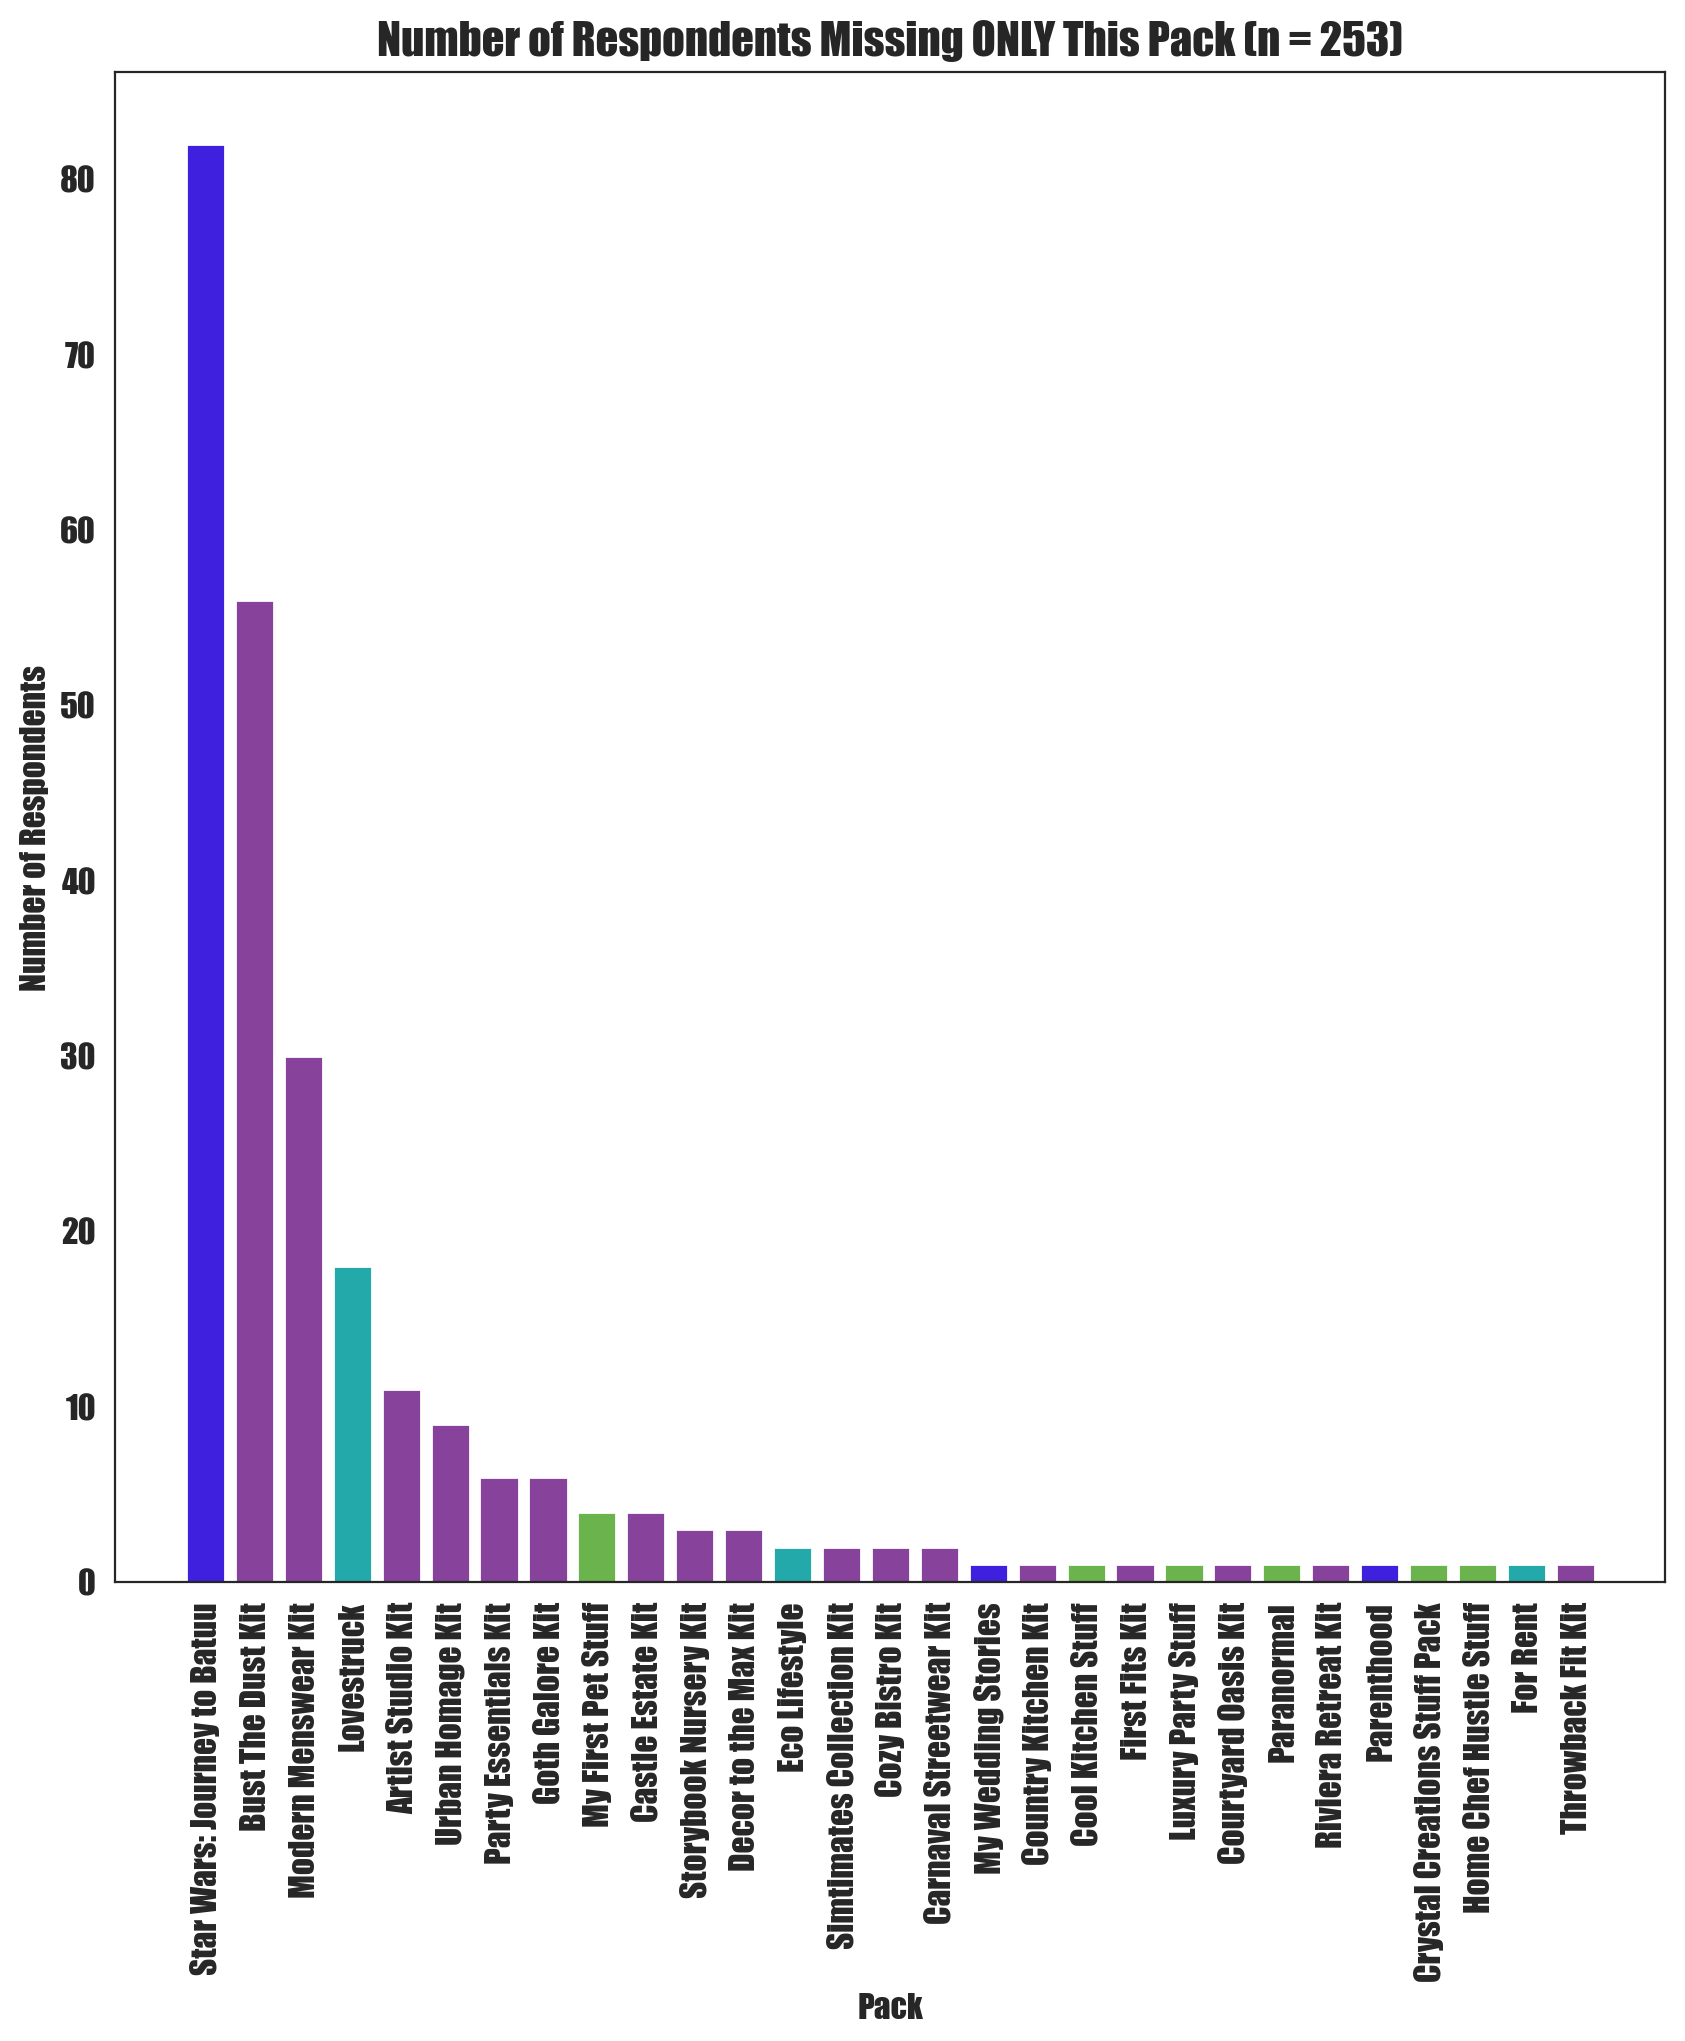

In [309]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)
sns.barplot(
    data = last_pack[last_pack['Num Missing'] > 0].reset_index(),
    x = 'pack name',
    y = 'Num Missing',
    palette = cmap_for_packs
)
# max_packs =  num_packs_owned.max()[0] + 1
# ax.set_xticks(range(0, max_packs, num_packs_owned.max()[0]//16))
# ax.set_xlim((0 - 0.5, max_packs - 0.5))

plt.xticks(rotation=90) 
ax.set_xlabel('Pack')
ax.set_ylabel('Number of Respondents')
ax.set_title(f'Number of Respondents Missing ONLY This Pack (n = {respondents})')
plt.savefig('hist_one_pack_missing.png', bbox_inches = 'tight')
plt.plot()

## Question 2: How do people tend to score things?

One player may only rate everything from 3 - 7, but another really uses the full scale. Can we normalize to a player's own rating scale?

In [326]:
# add in additional pack information and the survey respondent's play style

raw_data_all = pd.merge(
    left = raw_data,
    left_on = 'pack_code',
    right = pack_info,
    right_on = 'pack_id',
    how = 'left'
)   
raw_data_all = pd.merge(
    left = raw_data_all,
    left_on = 'survey_id',
    right = gamer_type_raw,
    right_index = True
)
raw_data_all

,result_id,survey_id,pack_code,rating,gameplay,buildmode,cas,world,bugs,promo,bugeffect,getpack,getpackbugs,pack_type,release date,pack_id,pack name,player_cas,player_build,player_live
0,1,1,EP01,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3.0,0.0,Expansion Packs,03/31/2015,EP01,Get To Work,True,False,True
1,2,1,EP02,NaN,6.0,6.0,4.0,8.0,3.0,0,0,NaN,NaN,Expansion Packs,12/08/2015,EP02,Get Together,True,False,True
2,3,1,EP03,NaN,7.0,6.0,5.0,9.0,2.0,0,0,NaN,NaN,Expansion Packs,11/01/2016,EP03,City Living,True,False,True
3,4,1,EP04,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2.0,0.0,Expansion Packs,11/10/2017,EP04,Cats & Dogs,True,False,True
4,5,1,EP05,NaN,8.0,6.0,5.0,NaN,2.0,0,0,NaN,NaN,Expansion Packs,06/22/2018,EP05,Seasons,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227631,1227632,15156,SP51,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4.0,NaN,Kits,04/18/2024,SP51,Party Essentials Kit,False,False,True
1227632,1227633,15156,SP52,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4.0,NaN,Kits,05/30/2024,SP52,Riviera Retreat Kit,False,False,True
1227633,1227634,15156,SP53,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4.0,NaN,Kits,05/30/2024,SP53,Cozy Bistro Kit,False,False,True
1227634,1227635,15156,SP55,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2.0,NaN,Kits,09/19/2024,SP55,Storybook Nursery Kit,False,False,True


In [ ]:
raw_data_all.groupby('survey_id')[['gameplay', '.describe()

## Question 3: Does play style impact the score?

Does play style impact the ratings a player gave? Do certain packs see more of a correlation than others?

### boxplot of respondent score
can i just put it all in there or will it take forever to load?

In [334]:
truefalse_colors_raw = {True: (9,153,240), # game pack lighter blue/purple
                    False:  (43,0,255) # game pack royal blue/purple
                   }
truefalse_colors = {}
for name, (r,g,b) in truefalse_colors_raw.items():
    new_rgb = ( r / 255.0, g / 255.0, b / 255.0, 1 )
    truefalse_colors[name] = new_rgb

[]

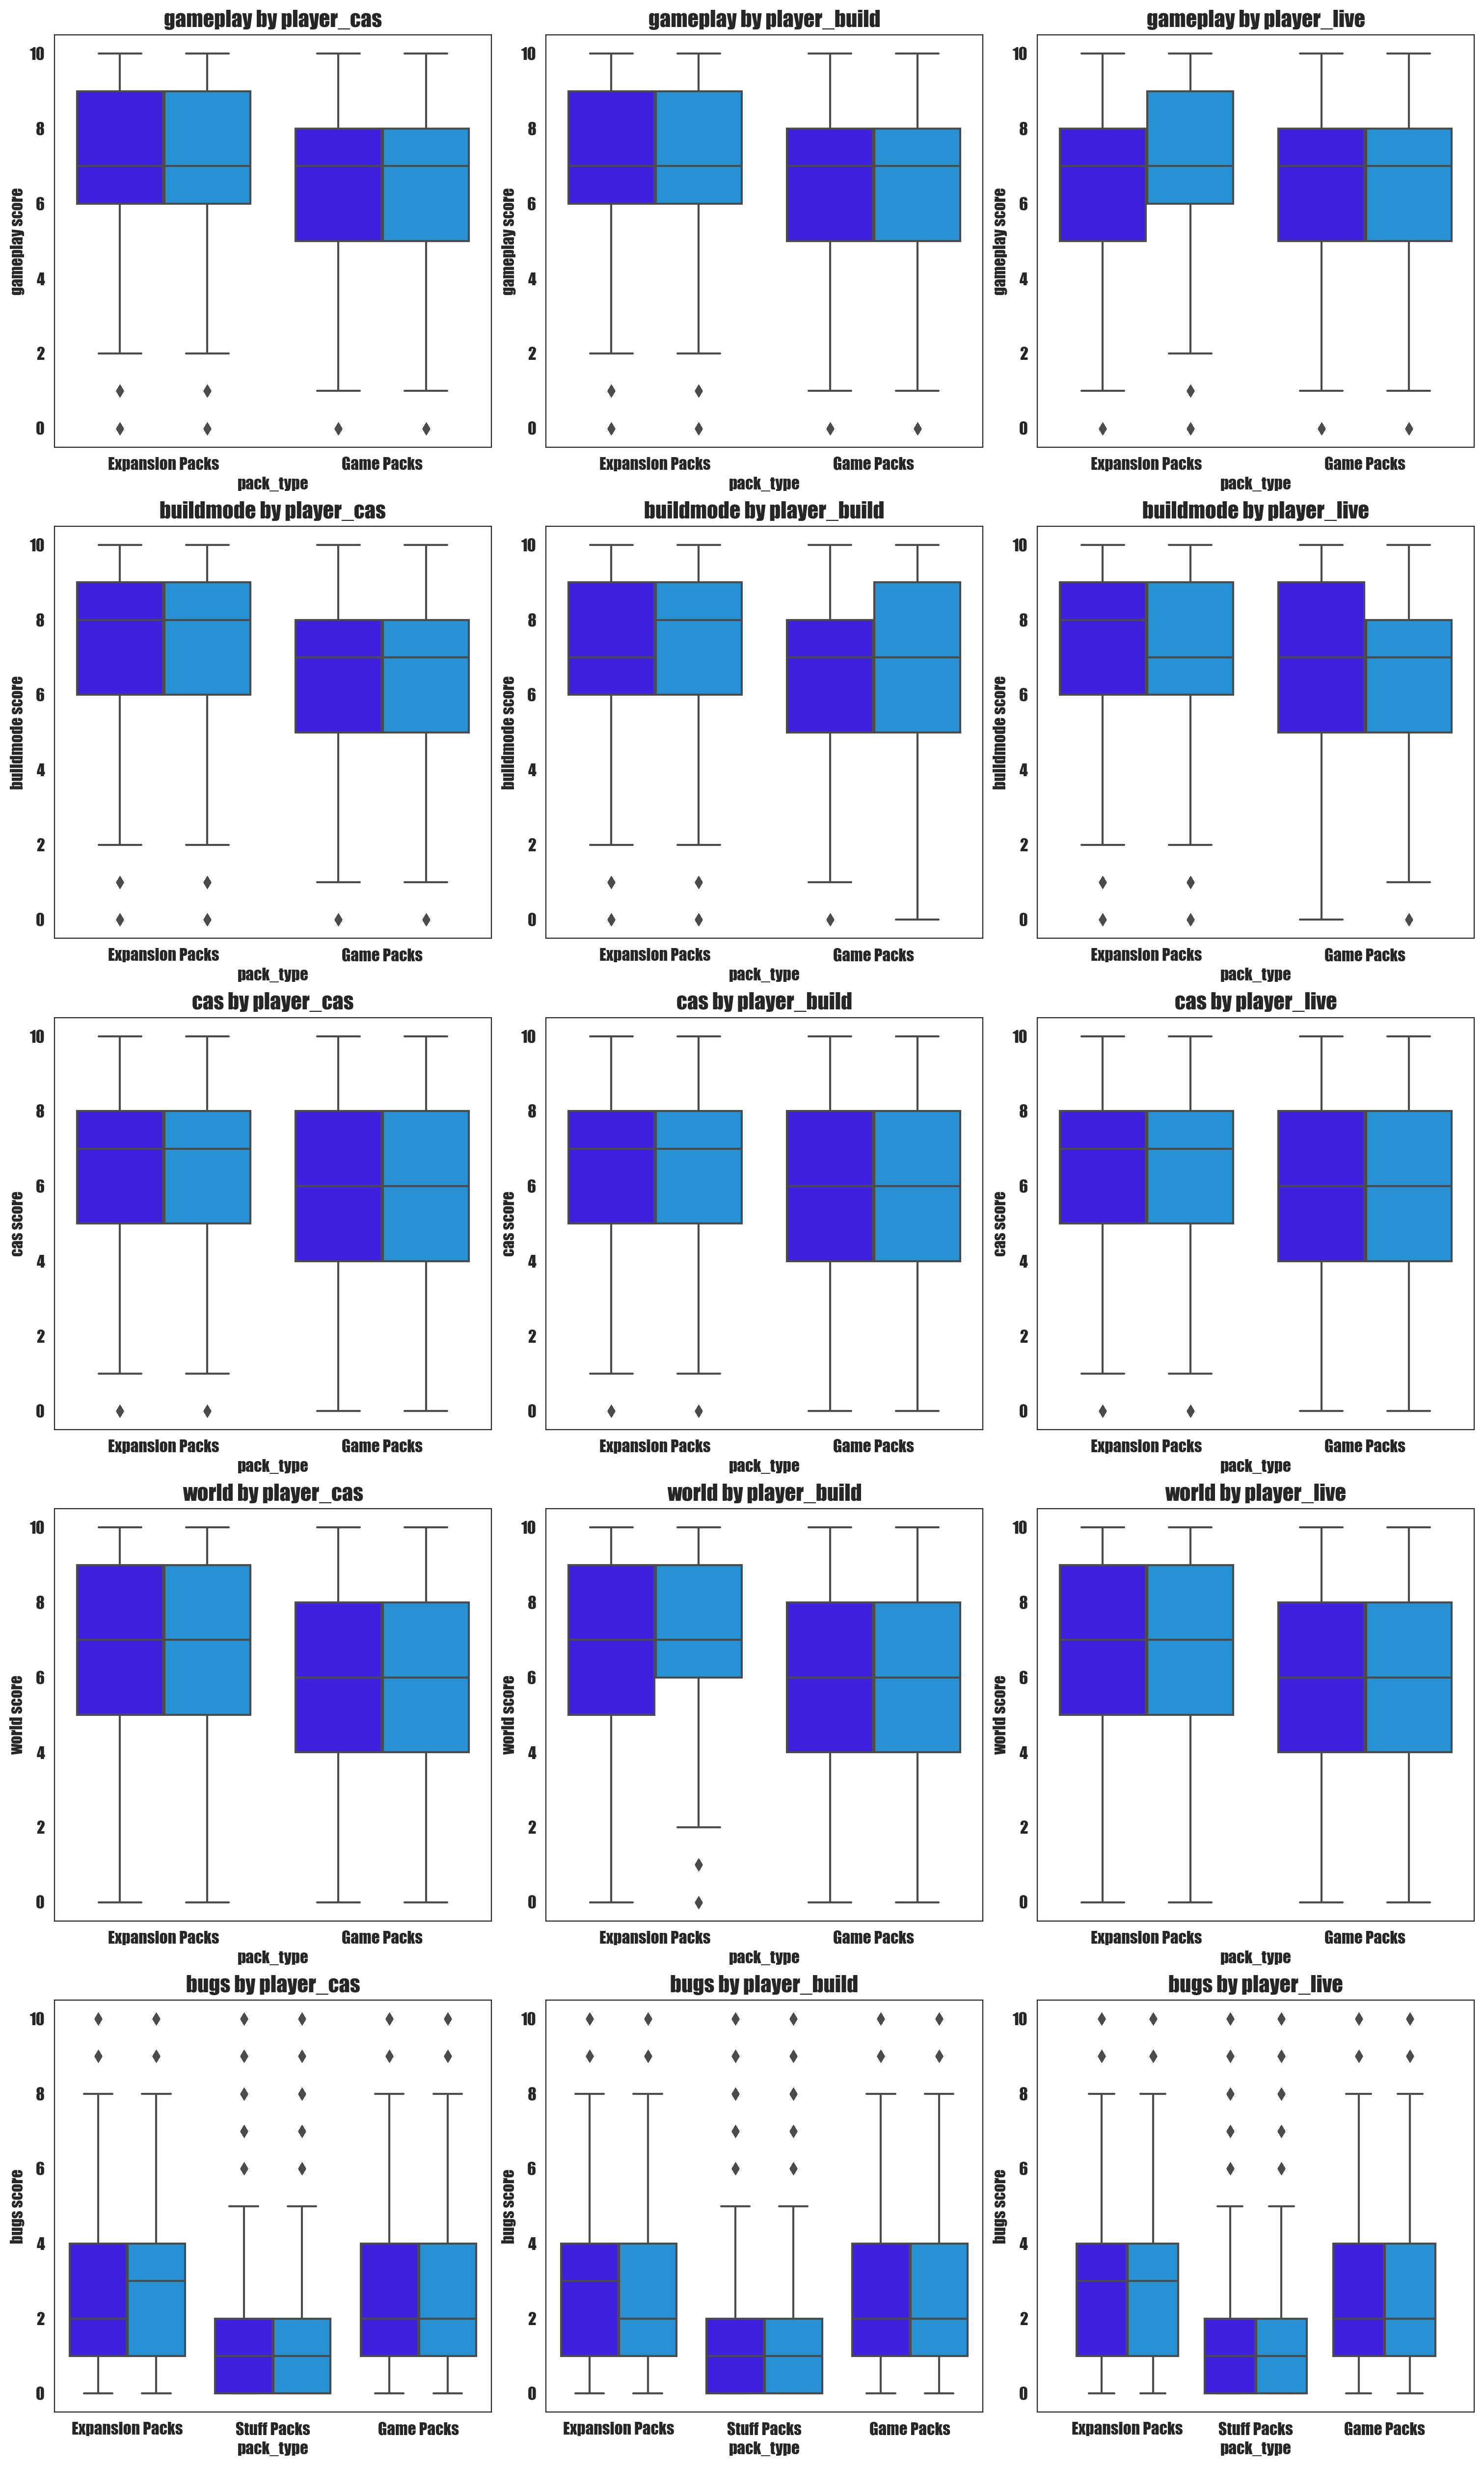

In [353]:
score_metrics = ['gameplay', 'buildmode', 'cas', 'world', 'bugs']
player_types = ['player_cas', 'player_build', 'player_live']

fig, axes = plt.subplots(figsize = (len(player_types) * 5, len(score_metrics) * 5), dpi = 200,
                         ncols = len(player_types),
                         nrows = len(score_metrics),
                         constrained_layout = True
                        )

for score_metric in score_metrics:
    for player_type in player_types:
        
        ax_x = score_metrics.index(score_metric)
        ax_y = player_types.index(player_type)
        ax = axes[ax_x,ax_y]
        
        sns.boxplot(
            data = raw_data_all[~raw_data_all[score_metric].isna()],
            hue = player_type,
            y = score_metric,
            x = 'pack_type',
            palette = truefalse_colors,
            ax = ax
        )
        ax.get_legend().set_visible(False)
        ax.set_ylabel(f'{score_metric} score')
        ax.set_title(f'{score_metric} by {player_type}')

plt.savefig('score_by_player_boxplots.png', bbox_inches = 'tight')
plt.plot()

[]

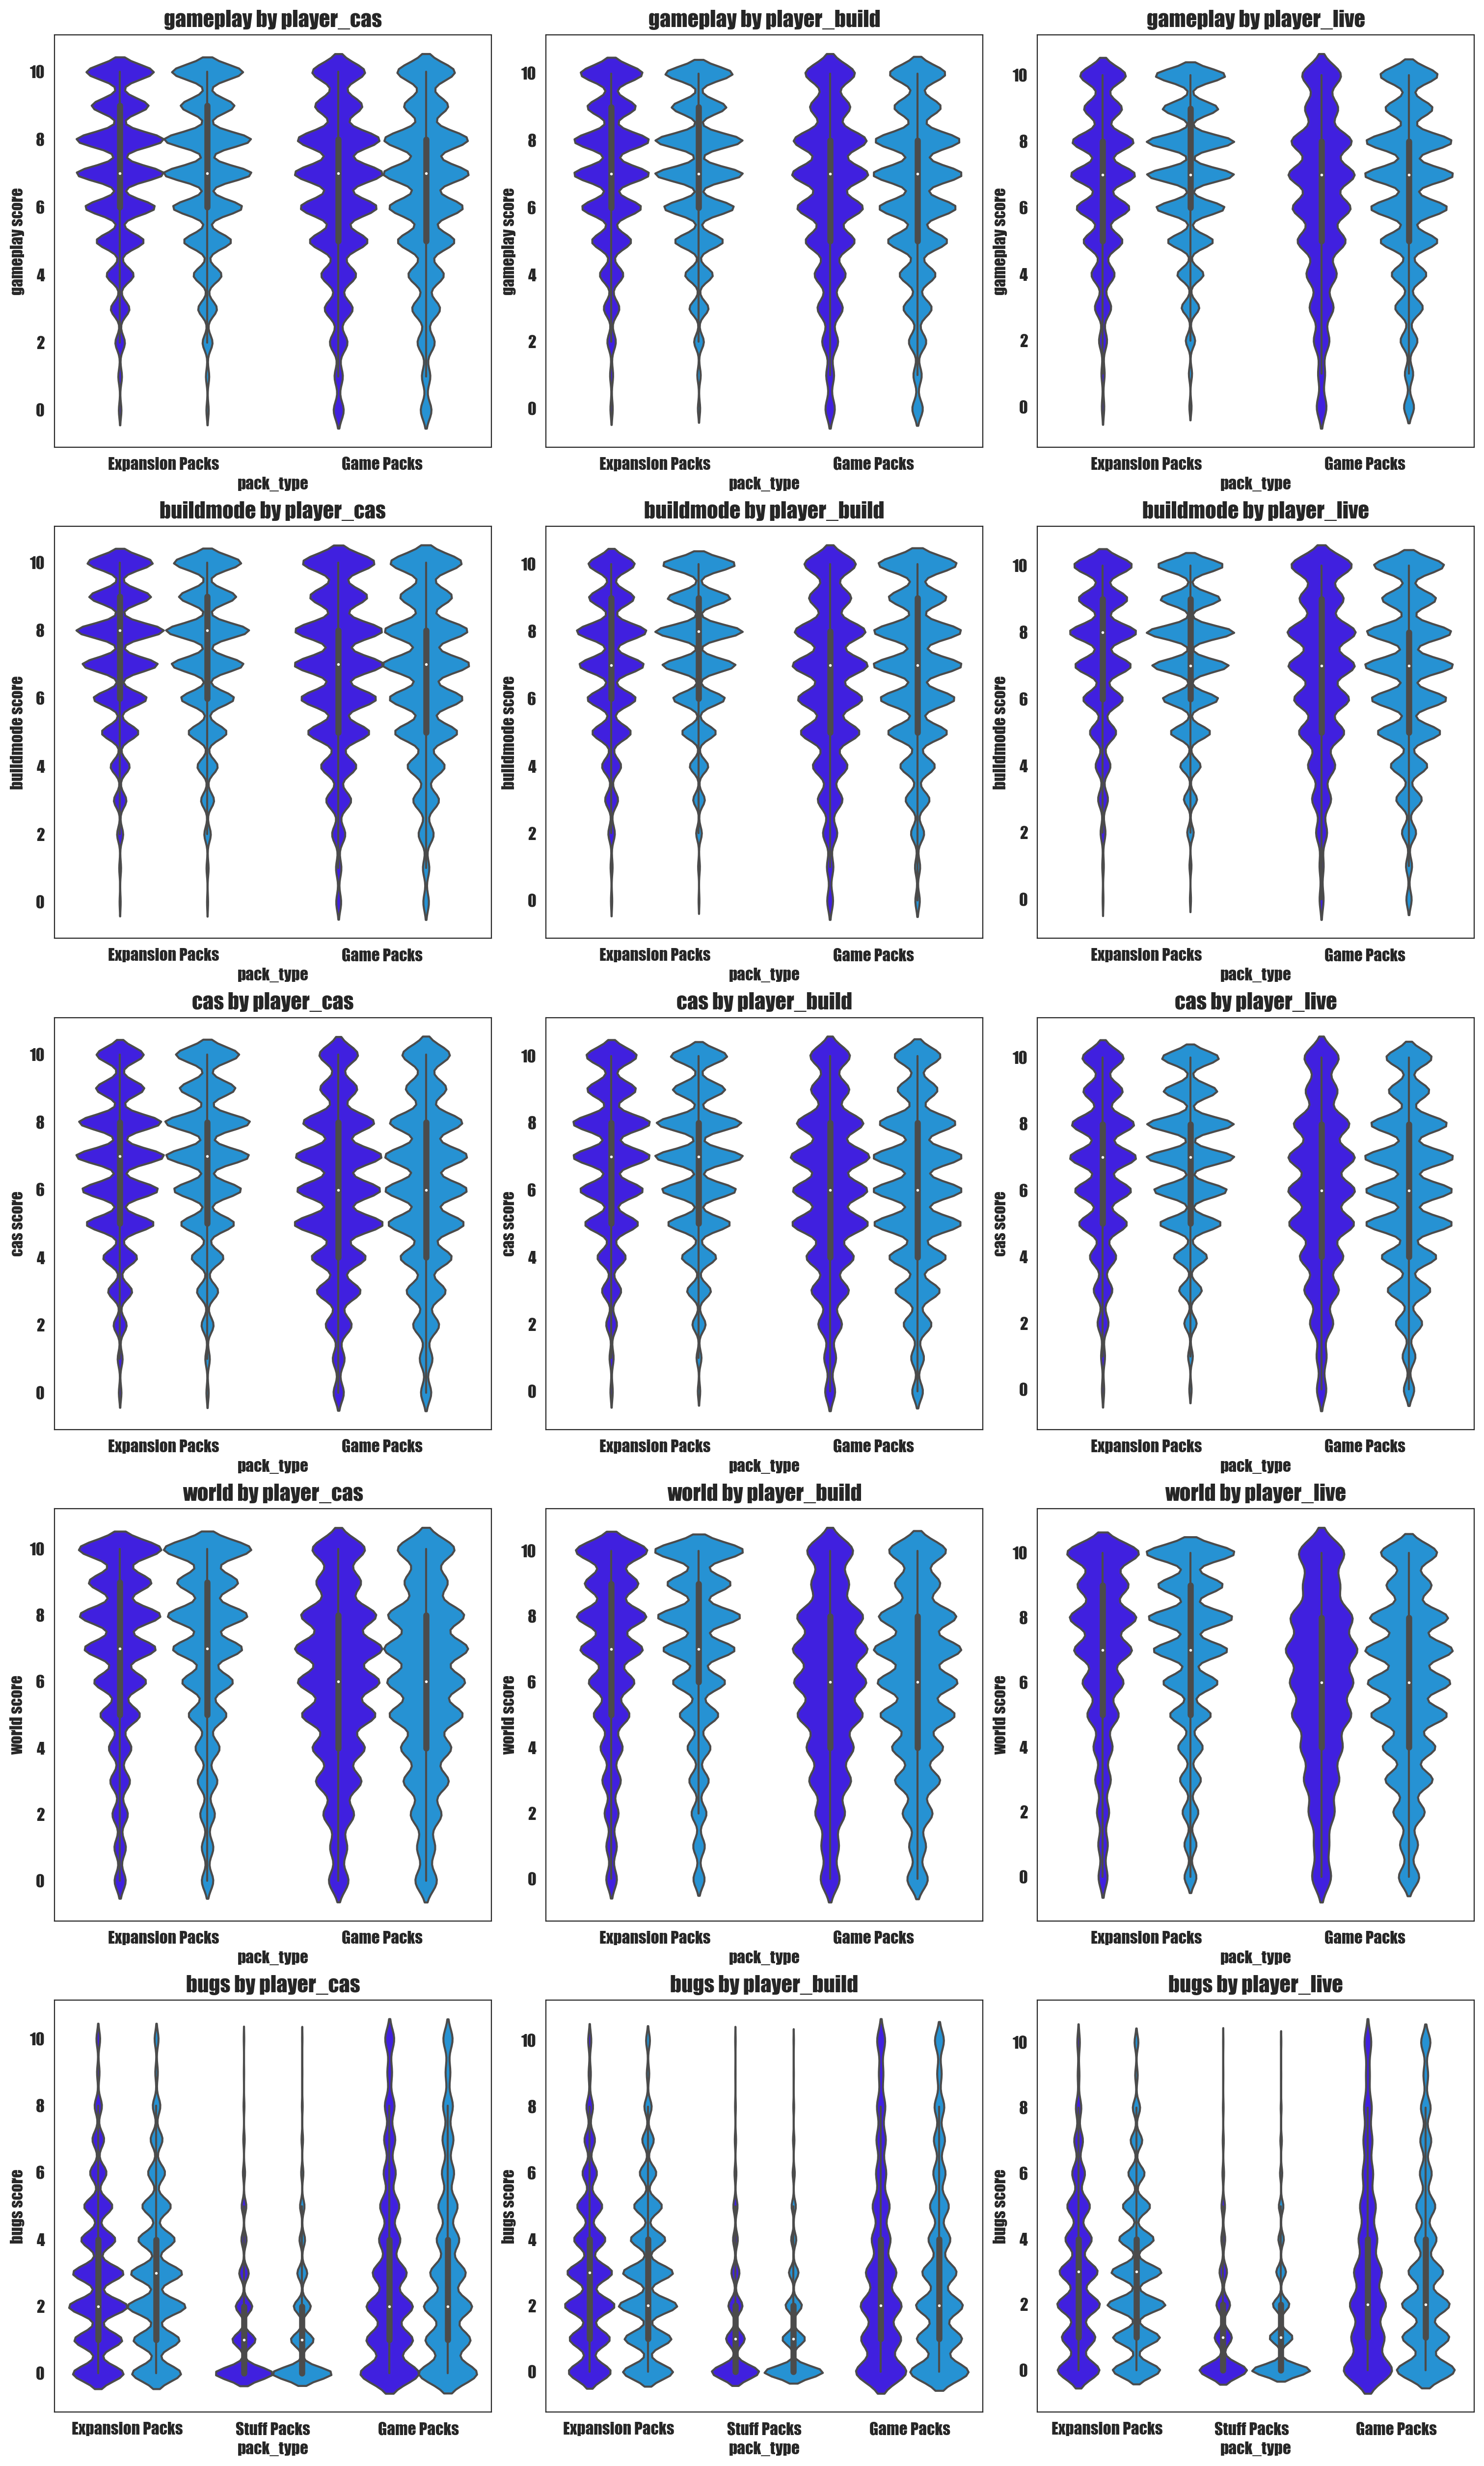

In [354]:
score_metrics = ['gameplay', 'buildmode', 'cas', 'world', 'bugs']
player_types = ['player_cas', 'player_build', 'player_live']

fig, axes = plt.subplots(figsize = (len(player_types) * 5, len(score_metrics) * 5), dpi = 200,
                         ncols = len(player_types),
                         nrows = len(score_metrics),
                         constrained_layout = True
                        )

for score_metric in score_metrics:
    for player_type in player_types:
        
        ax_x = score_metrics.index(score_metric)
        ax_y = player_types.index(player_type)
        ax = axes[ax_x,ax_y]
        
        sns.violinplot(
            data = raw_data_all[~raw_data_all[score_metric].isna()],
            hue = player_type,
            y = score_metric,
            x = 'pack_type',
            palette = truefalse_colors,
            ax = ax
        )
        ax.get_legend().set_visible(False)
        ax.set_ylabel(f'{score_metric} score')
        ax.set_title(f'{score_metric} by {player_type}')

plt.savefig('score_by_player_violin.png', bbox_inches = 'tight')
plt.plot()

I think people's scores overall were almost identical regardless of their play style, unfortunately.

I could maybe check out some more formal distributions, but this feels like enough

### mixed effects model check

In [361]:
import statsmodels.formula.api as smf

In [364]:
%%time

gameplay_set = raw_data_all[~raw_data_all['gameplay'].isna()]

# Mixed-effects model, see if gamepack score is related to the 3 build types, by respondent and pack ID
model = smf.mixedlm("gameplay ~ player_cas * player_build * player_live", 
                    gameplay_set, groups = gameplay_set["pack_id"], re_formula="~survey_id")
gameplay_result = model.fit()
print(gameplay_result.summary())

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

##### Interpretation from ChatGPT

Intercept:
* Intercept = 6.360: The baseline level of the gameplay score when all categorical variables (player_cas, player_build, player_live) are set to False.

Main Effects (none are statistically significant!)
* player_cas[T.True] = 0.169: When player_cas is True, the gameplay score increases by 0.169, on average, compared to when it is False, holding other variables constant.
* player_build[T.True] = 0.031: When player_build is True, the gameplay score increases by 0.031 compared to when it is False, controlling for other factors.
* player_live[T.True] = 0.256: When player_live is True, the gameplay score increases by 0.256 compared to when it is False.

Random Effects:
* The random variance of survey_id (Group Var = 0.724) indicates variability in gameplay scores across respondents.

#### run model for other score types

In [365]:
%%time

score_type_results = {}
for scoring in score_metrics:
    print(scoring)
    score_set = raw_data_all[~raw_data_all[scoring].isna()]

    # Mixed-effects model, see if score is related to the 3 build types, by respondent and pack ID
    model = smf.mixedlm(f"{scoring} ~ player_cas * player_build * player_live", 
                        score_set, groups = score_set["pack_id"], re_formula="~survey_id")
    result = model.fit()
    score_type_results[scoring] = result
    print(gameplay_result.summary())

gameplay


/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                              Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              gameplay    
No. Observations:              302747               Method:                          REML        
No. Groups:                    28                   Scale:                           4.3783      
Min. group size:               4727                 Log-Likelihood:                  -653529.7977
Max. group size:               14295                Converged:                       No          
Mean group size:               10812.4                                                           
-------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------
Intercept                                         

/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/gabimuir/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


I think the result of all of this is that there is absolutely no correlation between play styles :( 

## Question 4: Which packs are clustered based on ownerships?

Do people tend to buy certain sets of packs? Is that pack clustering different per play style?

## Question 5: Which packs do people want to get, which do they hate?

This is about the question of the survey where people rated if they would get a pack they don't already have

# Additional Question from Redditors

"The thing that I would be curious about is the difference in rates between pc players and console players for owning g all dlc. I know I own all the packs, but I don't know if I would if I was on pc." (people mentioned being forced to get specific bundles on consoles which were cheaper


"the fact that lovestruck is the expansion that people who own all packs except 1 - wonder if this is a 'just haven't got round to buying it yet' thing, or 'i will never buy it' thing - I am in the second camp because the relationship decay is not for me." "Being a relatively new pack, Lovestruck hadn't gone on the full discount price yet when the survey opened, which a lot of people wait for. A lot of people probably either acquired it after doing the survey (during the winter sale), or will during another sale."